## Two Compartment Models

Pharmacokinetic models often divide the body into compartments where drugs are distributed.  

```{admonition} Two compartment model
More complex models use **multi-compartment systems** to represent different tissues or organs, where the drug moves between compartments at different rates. For example, a two-component model can be used to model a central compartment (blood and well-perfused organs) and a peripheral compartment (poorly perfused tissues like muscle). 

![two-compartment](../../../images/compartments2.png)

This **2-compartment model** describes the pharmacokinetics of a drug in the body by considering two interconnected compartments: 
- The **central compartment** (e.g., blood plasma), where the drug is administered and from which it is eliminated.
- The **peripheral compartment** (e.g., tissues), where the drug can be distributed but does not directly eliminate.

```

### Central compartment
**Central Compartment** (compartment 1). The rate of change of the concentration in the central compartment depends on:
   - The amount entering the central compartment from the peripheral compartment $k_{21} C_2$.
   - The amount leaving the central compartment to the peripheral compartment $k_{12} C_1$.
   - The amount eliminated from the central compartment $k_{10} C_1$.

$$
   V_1 \frac{dC_1(t)}{dt} = -k_{10} V_1 C_1(t) - k_{12} V_1 C_1(t) + k_{21} V_2 C_2(t)
$$

   Simplifying:

$$
   \frac{dC_1(t)}{dt} = - (k_{10} + k_{12}) C_1(t) + k_{21} \frac{V_2}{V_1} C_2(t)
$$

where: 
-  $C_1(t)$ : Concentration of the drug in the central compartment at time  t .
-  $V_1$ : Volume of distribution of the central compartment.
-  $k_{12}$ : The rate of drug transfer from the central compartment to the peripheral compartment.
-  $k_{21}$ : The rate of drug transfer from the peripheral compartment to the central compartment.
-  $k_{10}$ : The rate of drug elimination from the central compartment.


### Peripheral Compartment
**Peripheral Compartment** (compartment 2):
   The rate of change of concentration in the peripheral compartment depends on:
   - The amount entering from the central compartment $k_{12} C_1$.
   - The amount leaving to the central compartment $k_{21} C_2$.

$$
   V_2 \frac{dC_2(t)}{dt} = k_{12} V_1 C_1(t) - k_{21} V_2 C_2(t)
$$

   Simplifying:

$$
   \frac{dC_2(t)}{dt} = k_{12} \frac{V_1}{V_2} C_1(t) - k_{21} C_2(t)
$$

where:
-  $C_2(t)$ : Concentration of the drug in the peripheral compartment at time  t .
-  $V_2$ : Volume of distribution of the peripheral compartment.


### Solving Two Coupled Differential Equations:
The two-compartment model is represented by the following coupled system of differential equations:

$$
\frac{dC_1(t)}{dt} = - (k_{10} + k_{12}) C_1(t) + k_{21} \frac{V_2}{V_1} C_2(t)
$$

$$
\frac{dC_2(t)}{dt} = k_{12} \frac{V_1}{V_2} C_1(t) - k_{21} C_2(t)
$$

### Initial Conditions:
Typically, at  t = 0, the drug is introduced into the central compartment, so:
-  $C_1(0)$ = $C_0$  (initial concentration in the central compartment).
-  $C_2(0)$ = $0$  (initial concentration in the peripheral compartment, assuming no drug is present there at time  t = 0 ).



### Analytical Solutions

$$
C_1(t) = \frac{C_0}{2} \left( e^{-\alpha t} + e^{-\beta t} \right)
$$

This describes the drug concentration in the **central compartment** (e.g., blood plasma), and it decays biexponentially, reflecting both the initial distribution of the drug between the compartments and the eventual elimination

1. **Distribution phase (represented by $e^{-\alpha t}$**: This is the faster phase in which the drug rapidly redistributes between the central and peripheral compartments.
2. **Elimination phase (represented by $e^{-\beta t}$**: This is the slower phase dominated by the drug elimination from the central compartment (e.g., through metabolism or excretion).


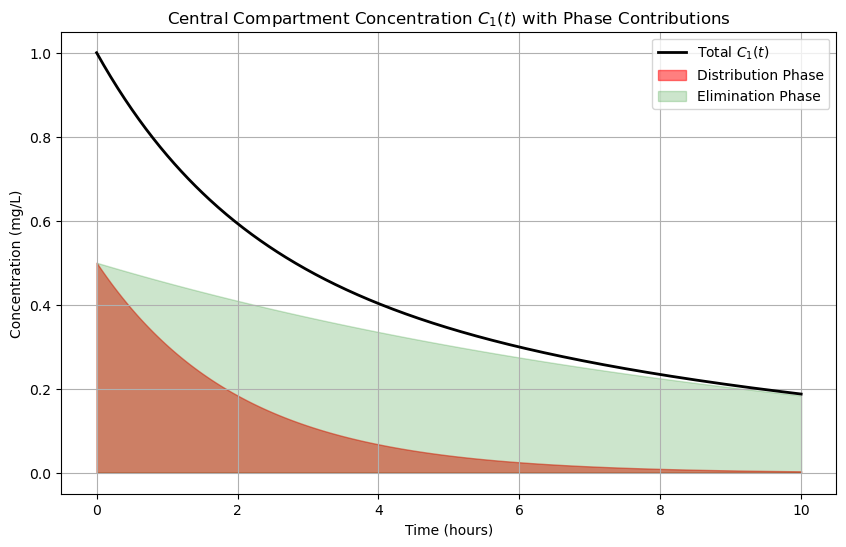

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
C0 = 1.0  # Initial concentration in the central compartment
alpha = 0.5  # Rate constant for the distribution phase (1/hr)
beta = 0.1   # Rate constant for the elimination phase (1/hr)
t = np.linspace(0, 10, 500)  # Time points from 0 to 24 hours

# Define the two phases
def distribution_phase(t, C0, alpha):
    return (C0 / 2) * np.exp(-alpha * t)

def elimination_phase(t, C0, beta):
    return (C0 / 2) * np.exp(-beta * t)

# Total C1(t) = Distribution + Elimination
C1_total = distribution_phase(t, C0, alpha) + elimination_phase(t, C0, beta)

# Plotting the functions
plt.figure(figsize=(10, 6))

# Plot the total concentration C1(t)
plt.plot(t, C1_total, label=r'Total $C_1(t)$', color='black', lw=2)

# Fill area under the distribution phase curve
plt.fill_between(t, 0, distribution_phase(t, C0, alpha), color='red', alpha=0.5, label='Distribution Phase')

# Fill area under the elimination phase curve
plt.fill_between(t, 0, elimination_phase(t, C0, beta), color='green', alpha=0.2, label='Elimination Phase')

# Labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('Central Compartment Concentration $C_1(t)$ with Phase Contributions')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.show()


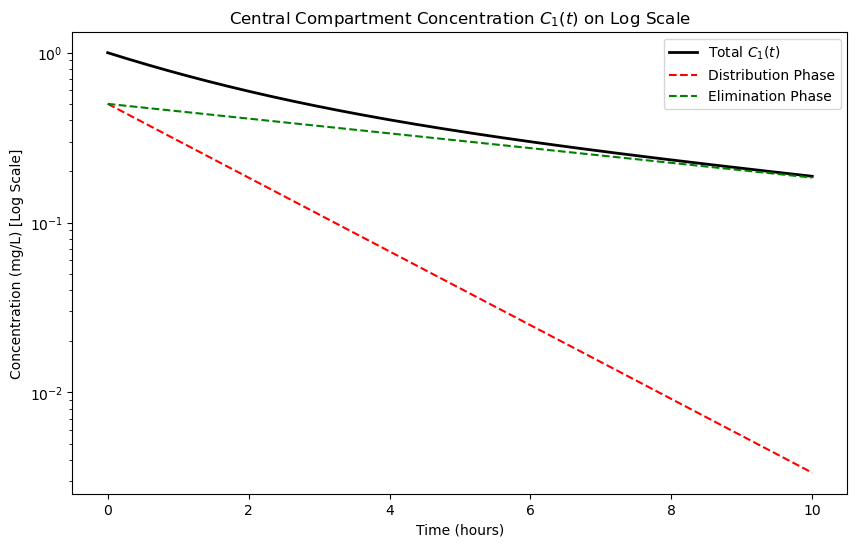

In [14]:
# Plotting the functions
plt.figure(figsize=(10, 6))

# Plot the total concentration C1(t)
plt.plot(t, C1_total, label=r'Total $C_1(t)$', color='black', lw=2)

# Plot the distribution phase (red line)
plt.plot(t, distribution_phase(t, C0, alpha), label='Distribution Phase', color='red', linestyle='--')

# Plot the elimination phase (green line)
plt.plot(t, elimination_phase(t, C0, beta), label='Elimination Phase', color='green', linestyle='--')

# Set y-axis to log scale
plt.yscale('log')

# Labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L) [Log Scale]')
plt.title('Central Compartment Concentration $C_1(t)$ on Log Scale')
plt.legend()

# Show grid and plot
plt.grid(True, which="both", ls="--")
plt.show()
